In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/pj/Desktop/us-patent-phrase-to-phrase-matching/train.csv')
eval_df = pd.read_csv('/Users/pj/Desktop/us-patent-phrase-to-phrase-matching/test.csv')

In [3]:
df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [4]:
df.isna().sum()

id         0
anchor     0
target     0
context    0
score      0
dtype: int64

In [5]:
df.isnull()

,id,anchor,target,context,score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
36468,False,False,False,False,False
36469,False,False,False,False,False
36470,False,False,False,False,False
36471,False,False,False,False,False


In [6]:
df.count()

id         36473
anchor     36473
target     36473
context    36473
score      36473
dtype: int64

In [7]:
df.nunique(axis = 0)

id         36473
anchor       733
target     29340
context      106
score          5
dtype: int64

In [8]:
df.score.unique()

array([0.5 , 0.75, 0.25, 0.  , 1.  ])

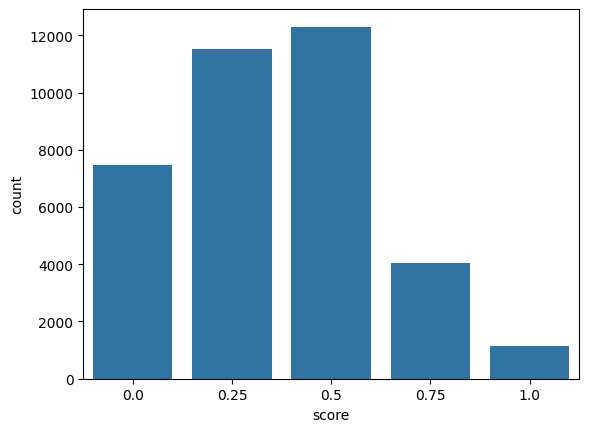

In [9]:

ax = sns.countplot(x = "score", data = df)

In [10]:
df.shape


(36473, 5)

In [11]:
df[df.score==1]

,id,anchor,target,context,score
28,473137168ebf7484,abatement,abating,F24,1.0
158,621b048d70aa8867,absorbent properties,absorbent characteristics,D01,1.0
161,bc20a1c961cb073a,absorbent properties,absorption properties,D01,1.0
311,e955700dffd68624,acid absorption,absorption of acid,B08,1.0
315,3a09aba546aac675,acid absorption,acid absorption,B08,1.0
...,...,...,...,...,...
36398,913141526432f1d6,wiring trough,wiring troughs,F16,1.0
36435,ee0746f2a8ecef97,wood article,wood articles,B05,1.0
36440,ecaf479135cf0dfd,wood article,wooden article,B05,1.0
36464,8ceaa2b5c2d56250,wood article,wood article,B44,1.0


In [12]:
from datasets import Dataset, DatasetDict

In [13]:
ds = Dataset.from_pandas(df)

In [14]:
from transformers import RobertaTokenizer, RobertaModel
import torch

In [15]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2925, 0.9797, 0.0850],
        [0.4612, 0.4320, 0.1992],
        [0.6225, 0.2971, 0.0734],
        [0.6088, 0.2624, 0.9190],
        [0.7999, 0.9790, 0.2377]])


In [16]:
#from nltk.stem import WordNetLemmatizer

In [17]:
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score'],
    num_rows: 36473
})

In [114]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')
#lemmatizer = WordNetLemmatizer()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [115]:
tokenizer.tokenize('What is my name?')

['What', 'Ġis', 'Ġmy', 'Ġname', '?']

In [116]:
tokenizer.all_special_tokens


['<s>', '</s>', '<unk>', '<pad>', '<mask>']

In [37]:
#def lemmatize_and_tokenize(examples):
    # Tokenize the text data
    tokens = [tokenizer.tokenize(example) for example in examples]
    
    # Lemmatize each token
    #lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in token_list] for token_list in tokens]
    
    # Join the lemmatized tokens into a string
    #lemmatized_text = [' '.join(token_list) for token_list in lemmatized_tokens]
    
    # Encode the lemmatized text using the tokenizer
    #encoded_output = tokenizer(lemmatized_text, truncation=True, padding='max_length', max_length=256, return_tensors='pt')
    
    # Get the encoded vector form of the input text
    #input_ids = encoded_output['input_ids']
    
    #return {'input_ids': input_ids}

In [119]:
def tok_func(x): 
    anchor_tok = tokenizer(x['anchor'], truncation=True, padding='max_length', max_length=256, return_tensors='pt')
    target_tok = tokenizer(x['target'], truncation=True, padding='max_length', max_length=256, return_tensors='pt')
    return {
        'anchor_input_ids': anchor_tok.input_ids.squeeze(0),
        'anchor_attention_mask': anchor_tok.attention_mask.squeeze(0),
       'target_input_ids': target_tok.input_ids.squeeze(0),
       'target_attention_mask': target_tok.attention_mask.squeeze(0)
    }

In [145]:
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [146]:
 tok_ds[0]

{'id': '37d61fd2272659b1',
 'anchor': 'abatement',
 'target': 'abatement of pollution',
 'context': 'A47',
 'score': 0.5,
 'anchor_input_ids': [0,
  873,
  415,
  6285,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
 

In [121]:
#def encode_anchor(x):
#    anchor_embeddings = encode_phrases(x['anchor'])
 #   return {'anchor_embeddings': anchor_embeddings}

In [122]:
#def encode_target(x):
#    target_embeddings = encode_phrases(x['target'])
#    return {'target_embeddings': target_embeddings}


In [123]:
#encoded_ds = tok_ds.map(encode_anchor)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [124]:
#encoded_ds = encoded_ds.map(encode_target)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [147]:
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'score', 'anchor_input_ids', 'anchor_attention_mask', 'target_input_ids', 'target_attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'score', 'anchor_input_ids', 'anchor_attention_mask', 'target_input_ids', 'target_attention_mask'],
        num_rows: 9119
    })
})

In [148]:
dds = tok_ds.train_test_split(0.25, seed = 32)

In [149]:
print(len(dds['train']))  # Should print a non-zero value
print(len(dds['test']))

27354
9119


In [150]:
print(dds.keys())

dict_keys(['train', 'test'])


In [151]:
print(dds)

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'score', 'anchor_input_ids', 'anchor_attention_mask', 'target_input_ids', 'target_attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'score', 'anchor_input_ids', 'anchor_attention_mask', 'target_input_ids', 'target_attention_mask'],
        num_rows: 9119
    })
})


In [106]:
#def compute_accuracy(eval_pred):
#    predictions, labels = eval_pred
#    predictions = np.argmax(predictions, axis=1)
#    return {'accuracy': (predictions == labels).mean()}

In [152]:
from transformers import TrainingArguments, Trainer


In [159]:
learning_rate = 8e-5
epochs = 5
batch_size = 128

In [160]:
training_args = TrainingArguments(
    'outputs',
    learning_rate=learning_rate,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    eval_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size*2,
    num_train_epochs=epochs,
    weight_decay=0.01,
    report_to='none'
)

In [161]:
trainer = Trainer(
    model=model,  # Pass the RobertaForSequenceClassification model
    args=training_args,
    train_dataset=dds['train'], eval_dataset=dds['test'], tokenizer=tokenizer
    #compute_metrics=compute_accuracy
)

In [162]:
trainer.train();

IndexError: list index out of range